### Random Sample Imputation
Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used?

It assumes that the data are missing completely at random


In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df['Age'].dropna().sample()

394    24.0
Name: Age, dtype: float64

In [4]:
# the below command will replace all the nan value with random number
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [5]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## it will have the random sample to fill the nan
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have some index in order to the dataset
    random_sample_index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]= random_sample
    

In [6]:
 median = df.Age.median()
median

28.0

In [7]:
impute_nan(df,'Age',median)

In [8]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

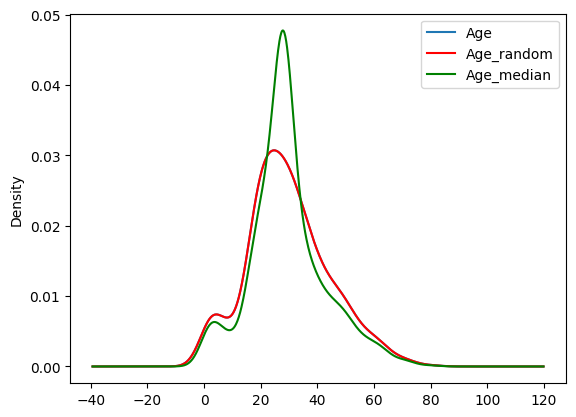

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df['Age_random'].plot(kind='kde', ax=ax, color='red')
df['Age_median'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

##### Advantages
1. Easy to implement
2. There is less distortion

##### Disadvantages
1. Every situation randomness wont work

### Techniques-3 : Capturing NAN values with a new features

It works well if the data are not missing completely at random

In [11]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1 ,0)

In [13]:
df

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [14]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [15]:
df.head(100)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
95,0,28.0,8.0500,1
96,0,71.0,34.6542,0
97,1,23.0,63.3583,0
98,1,34.0,23.0000,0


##### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating additional features(Curse of dimentionality)

### Techniques-4 : End of Distribution Imputation

In [16]:
df = pd.read_csv('titanic.csv', usecols = ['Age','Survived','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

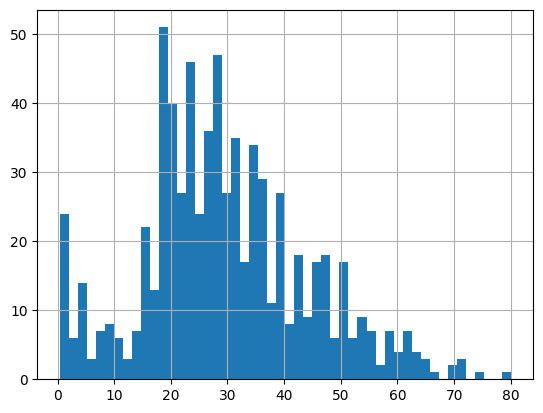

In [17]:
df.Age.hist(bins=50)

In [18]:
# We are trying to take the end of the distribution
df.Age.mean()

29.69911764705882

In [28]:
extreme = df.Age.mean()+3*df.Age.std()
median = df.Age.median()


In [29]:
import seaborn as sns


<Axes: xlabel='Age'>

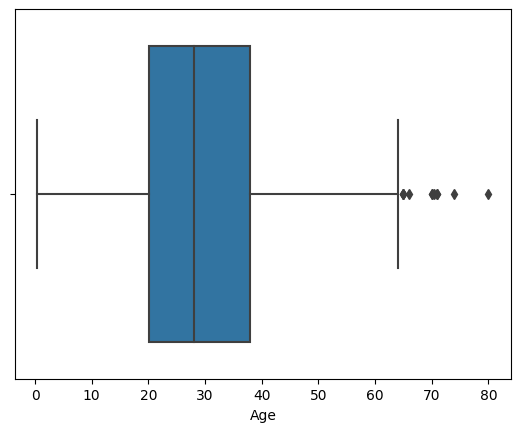

In [48]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
sns.boxplot(x='Age',data=df)
# It is clear that the outliers are present here

In [49]:
def impute_nan(df, variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    

In [50]:
impute_nan(df,'Age',median,extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

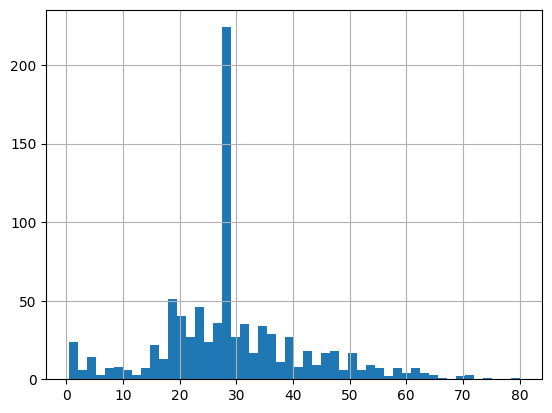

In [52]:
df['Age'].hist(bins=50)

<Axes: >

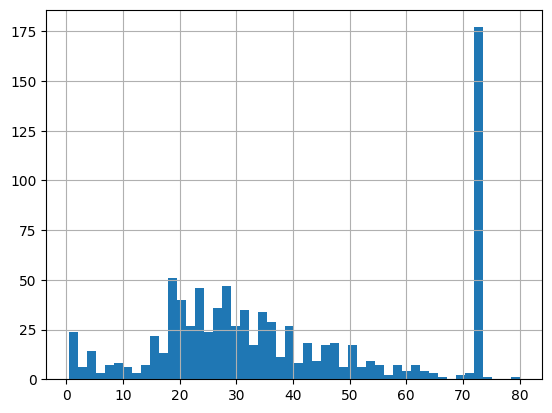

In [53]:
df['Age_end_distribution'].hist(bins=50)


<Axes: xlabel='Age_end_distribution'>

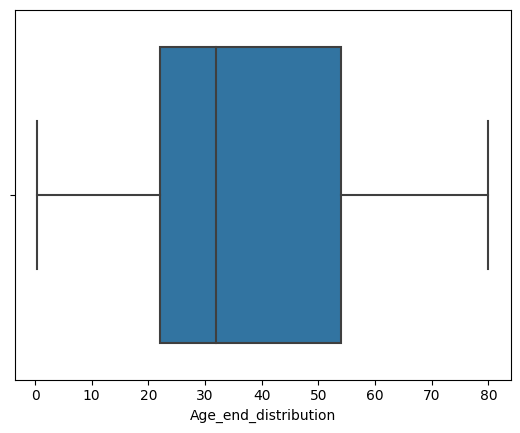

In [54]:
sns.boxplot(x='Age_end_distribution', data=df)
# It is clear that no outliers are present here

##### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one


##### Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important , it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outliers and pre-processed in a subsequent feature engineering
